#  使用Python绘制K线图

导入相关依赖包

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from candle import candlestick_ohlc

C:\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


读取csv数据

In [2]:
ssec2015=pd.read_csv('ssec2015.csv')
ssec2015.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,1,2015-03-02,3332.720947,3336.760010,3298.668945,3336.284912,346400
1,2,2015-03-03,3317.695068,3317.695068,3260.428955,3263.052002,382000
2,3,2015-03-04,3264.181885,3286.587891,3250.483887,3279.532959,293600
3,4,2015-03-05,3264.084961,3266.637939,3221.666016,3248.476074,320700
4,5,2015-03-06,3248.035889,3266.933105,3234.532959,3241.187012,282900


删除冗余数据（首列字段）

In [3]:
ssec2015=ssec2015.iloc[:,1:]
ssec2015

,Date,Open,High,Low,Close,Volume
0,2015-03-02,3332.720947,3336.760010,3298.668945,3336.284912,346400
1,2015-03-03,3317.695068,3317.695068,3260.428955,3263.052002,382000
2,2015-03-04,3264.181885,3286.587891,3250.483887,3279.532959,293600
3,2015-03-05,3264.084961,3266.637939,3221.666016,3248.476074,320700
4,2015-03-06,3248.035889,3266.933105,3234.532959,3241.187012,282900
5,2015-03-09,3224.313965,3307.701904,3198.370117,3302.407959,321500
6,2015-03-10,3289.084961,3309.915039,3277.094971,3286.068115,285800
7,2015-03-11,3289.593994,3325.053955,3278.470947,3290.899902,283000
8,2015-03-12,3314.812988,3360.053955,3300.488037,3349.322998,357300
9,2015-03-13,3359.488037,3391.254883,3352.149902,3372.910889,328400


In [4]:
ssec2015.head(n=3)


,Date,Open,High,Low,Close,Volume
0,2015-03-02,3332.720947,3336.760010,3298.668945,3336.284912,346400
1,2015-03-03,3317.695068,3317.695068,3260.428955,3263.052002,382000
2,2015-03-04,3264.181885,3286.587891,3250.483887,3279.532959,293600


In [5]:
ssec2015.iloc[-3:,:]


,Date,Open,High,Low,Close,Volume
19,2015-03-27,3686.134033,3710.477051,3656.831055,3691.095947,408900
20,2015-03-30,3710.612061,3795.935059,3710.612061,3786.568115,564700
21,2015-03-31,3822.987061,3835.566895,3737.042969,3747.898926,561700


获取开盘价等信息 绘制k线图数据

In [6]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY,date2num
from datetime import datetime

In [7]:
ssec2015.Date=[date2num(datetime.strptime(date,"%Y-%m-%d"))\
               for date in ssec2015.Date]
                  


In [8]:
type(ssec2015)  

pandas.core.frame.DataFrame

In [9]:
ssec2015.head()

,Date,Open,High,Low,Close,Volume
0,735659.0,3332.720947,3336.760010,3298.668945,3336.284912,346400
1,735660.0,3317.695068,3317.695068,3260.428955,3263.052002,382000
2,735661.0,3264.181885,3286.587891,3250.483887,3279.532959,293600
3,735662.0,3264.084961,3266.637939,3221.666016,3248.476074,320700
4,735663.0,3248.035889,3266.933105,3234.532959,3241.187012,282900


开始绘制K线图

In [10]:
ssec15list=list()
for i in range(len(ssec2015)):
    ssec15list.append(ssec2015.iloc[i,:])

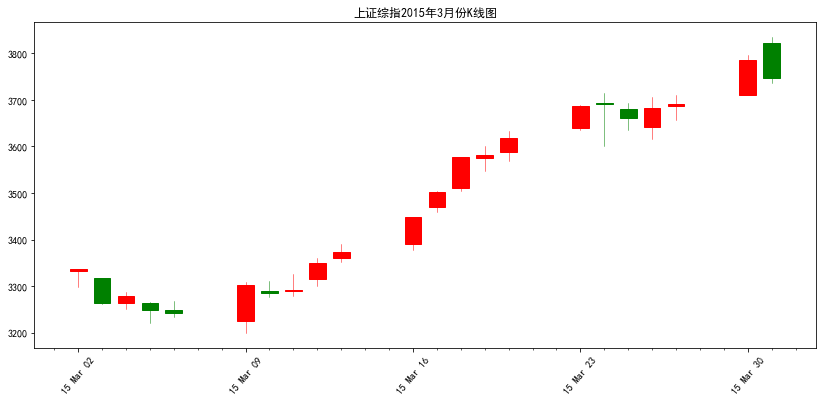

In [11]:
plt.figure(figsize=(14,6))  #设定画布大小
ax= plt.subplot()        
mondays = WeekdayLocator(MONDAY)  
weekFormatter = DateFormatter('%y %b %d')
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(DayLocator() )
ax.xaxis.set_major_formatter(weekFormatter)  #设定工作日作为时间轴
plt.rcParams['font.sans-serif'] = ['SimHei']  #设定字体 显示中文
plt.rcParams['axes.unicode_minus'] = False
ax.set_title("上证综指2015年3月份K线图")
candlestick_ohlc(ax, ssec15list, width=0.7,colorup='r', colordown='g')  #绘制蜡烛图
plt.setp(plt.gca().get_xticklabels(),rotation=50, horizontalalignment='center') 
plt.show()

寻找早晨之星

早晨之星的形态组成，一般是3个蜡烛构成，第一个是绿色的阴线，紧接着第二个是一个十字星，第三个蜡烛是一个红色阳线。且长度一般要求大于等于第一个蜡烛图的一半。

具体算法如下：
1 第一天的收盘价低于开盘价，即蜡烛绿色阴线，第二天的收盘价和开盘价大致相等，第三天蜡烛实体的红色收盘价高于开盘价，两者的差价要大于第一天差价的一半以上。
2 关于第二天的十字星，要求开盘价和收盘价同时小于第一天的收盘价和第三天的开盘价。
3 前期为下跌趋势




实战morning star  黎明之星

In [12]:
ssec2012=pd.read_csv('ssec2012.csv')
ssec2012.head()


,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,1,2012-01-04,2211.995117,2217.520020,2168.644043,2169.389893,49200
1,2,2012-01-05,2160.896973,2183.404053,2145.555908,2148.451904,58800
2,3,2012-01-06,2148.146973,2164.322021,2132.625977,2163.395020,50600
3,4,2012-01-09,2164.740967,2226.218018,2148.452881,2225.889893,76800
4,5,2012-01-10,2221.832031,2288.627930,2218.274902,2285.743896,109600


In [13]:
ssec2012.index=ssec2012.iloc[:,1]
ssec2012.index=pd.to_datetime(ssec2012.index, format='%Y-%m-%d')
ssec2012.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
Date,,,,,,,
2012-01-04,1,2012-01-04,2211.995117,2217.520020,2168.644043,2169.389893,49200
2012-01-05,2,2012-01-05,2160.896973,2183.404053,2145.555908,2148.451904,58800
2012-01-06,3,2012-01-06,2148.146973,2164.322021,2132.625977,2163.395020,50600
2012-01-09,4,2012-01-09,2164.740967,2226.218018,2148.452881,2225.889893,76800
2012-01-10,5,2012-01-10,2221.832031,2288.627930,2218.274902,2285.743896,109600


In [14]:
ssec2012=ssec2012.iloc[:,2:]
ssec2012.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-04,2211.995117,2217.520020,2168.644043,2169.389893,49200
2012-01-05,2160.896973,2183.404053,2145.555908,2148.451904,58800


In [15]:
ssec2012.iloc[-2:,:]

,Open,High,Low,Close,Volume
Date,,,,,
2012-12-28,2207.913086,2234.868896,2204.002930,2233.251953,116000
2012-12-31,2236.460938,2269.511963,2236.460938,2269.127930,128000


In [16]:
Close=ssec2012.Close
Open=ssec2012.Open
ClOp=Close-Open

In [17]:
Close.head()

Date
2012-01-04    2169.389893
2012-01-05    2148.451904
2012-01-06    2163.395020
2012-01-09    2225.889893
2012-01-10    2285.743896
Name: Close, dtype: float64

In [18]:
Open.head()

Date
2012-01-04    2211.995117
2012-01-05    2160.896973
2012-01-06    2148.146973
2012-01-09    2164.740967
2012-01-10    2221.832031
Name: Open, dtype: float64

为了计算绿色蜡烛 红色蜡烛和十字星的实体部分，我们需要计算每一个交易日的收盘价和开盘价的差值部分

In [19]:
ClOp.head()

Date
2012-01-04   -42.605224
2012-01-05   -12.445069
2012-01-06    15.248047
2012-01-09    61.148926
2012-01-10    63.911865
dtype: float64

In [20]:
ClOp.shift(1).head()

Date
2012-01-04          NaN
2012-01-05   -42.605224
2012-01-06   -12.445069
2012-01-09    15.248047
2012-01-10    61.148926
dtype: float64

In [21]:
ClOp.shift(2).head()

Date
2012-01-04          NaN
2012-01-05          NaN
2012-01-06   -42.605224
2012-01-09   -12.445069
2012-01-10    15.248047
dtype: float64

开始捕捉绿色蜡烛 红色蜡烛和十字星

In [22]:
###准备条件1
Shape = [0,0,0]
lag1ClOp=ClOp.shift(1)
lag2ClOp=ClOp.shift(2)

for i in range(3,len(ClOp),1):
    print ('lag1 is ' + str(lag1ClOp[i]) )
    print ('lag2 is ' + str (lag2ClOp[i] ))
    if all([lag2ClOp[i]<-11,abs(lag1ClOp[i])<2,\
    ClOp[i]>6,abs(ClOp[i])>abs(lag2ClOp[i]*0.5)]):
        Shape.append(1)
    else:
        Shape.append(0)

lag1 is 15.248047000000042
lag2 is -12.445068999999876
lag1 is 61.14892599999985
lag2 is 15.248047000000042
lag1 is 63.911865000000034
lag2 is 61.14892599999985
lag1 is -6.867188000000169
lag2 is 63.911865000000034
lag1 is 6.270995999999741
lag2 is -6.867188000000169
lag1 is -32.5
lag2 is 6.270995999999741
lag1 is -24.239990000000034
lag2 is -32.5
lag1 is 91.8439940000003
lag2 is -24.239990000000034
lag1 is -32.44897499999979
lag2 is 91.8439940000003
lag1 is 29.999022999999852
lag2 is -32.44897499999979
lag1 is 18.61792000000014
lag2 is 29.999022999999852
lag1 is -39.45483400000012
lag2 is 18.61792000000014
lag1 is 6.656004999999823
lag2 is -39.45483400000012
lag1 is -19.985839999999826
lag2 is 6.656004999999823
lag1 is 38.70580999999993
lag2 is -19.985839999999826
lag1 is 23.749023000000307
lag2 is 38.70580999999993
lag1 is -3.112061000000267
lag2 is 23.749023000000307
lag1 is -27.51879800000006
lag2 is -3.112061000000267
lag1 is 55.71801699999969
lag2 is -27.51879800000006
lag1 is 5.

In [23]:
len(Shape)

243

In [24]:
Shape.index(1)

165

定义下跌趋势
先计算收益率 ,定义十字星数据位置，十字星需要在绿色实体后面，红色实体前面

In [25]:
lagOpen=Open.shift(1)
lagClose=Close.shift(1)
lag2Close=Close.shift(2)

捕捉十字星

In [26]:
###准备条件2
Doji=[0,0,0]
for i in range(3,len(Open),1):
    if all([lagOpen[i]<Open[i],lagOpen[i]<lag2Close[i],\
    lagClose[i]<Open[i],(lagClose[i]<lag2Close[i])]):
        Doji.append(1)
    else:
        Doji.append(0)
Doji.count(1)

12

刻画下跌趋势

In [27]:
Close.shift(1).head(10)

Date
2012-01-04            NaN
2012-01-05    2169.389893
2012-01-06    2148.451904
2012-01-09    2163.395020
2012-01-10    2225.889893
2012-01-11    2285.743896
2012-01-12    2276.045898
2012-01-13    2275.010010
2012-01-16    2244.580078
2012-01-17    2206.193115
Name: Close, dtype: float64

In [28]:
Close.head(10)

Date
2012-01-04    2169.389893
2012-01-05    2148.451904
2012-01-06    2163.395020
2012-01-09    2225.889893
2012-01-10    2285.743896
2012-01-11    2276.045898
2012-01-12    2275.010010
2012-01-13    2244.580078
2012-01-16    2206.193115
2012-01-17    2298.375000
Name: Close, dtype: float64

In [29]:
ret=Close/Close.shift(1)-1
ret.head(5)

Date
2012-01-04         NaN
2012-01-05   -0.009652
2012-01-06    0.006955
2012-01-09    0.028887
2012-01-10    0.026890
Name: Close, dtype: float64

In [30]:
###准备条件3  下跌趋势判断
ret=Close/Close.shift(1)-1
lag1ret=ret.shift(1)
lag2ret=ret.shift(2)
Trend=[0,0,0]
for i in range(3,len(ret)):
    if all([lag1ret[i]<0,lag2ret[i]<0]):
        Trend.append(1)
    else:
        Trend.append(0)

In [31]:
StarSig=[]
for i in range(len(Trend)):
    if all([Shape[i]==1,Doji[i]==1,Trend[i]==1]):
        StarSig.append(1)
    else:
        StarSig.append(0)

for i in range(len(StarSig)):
    if StarSig[i]==1:
        print(ssec2012.index[i])

2012-09-06 00:00:00


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


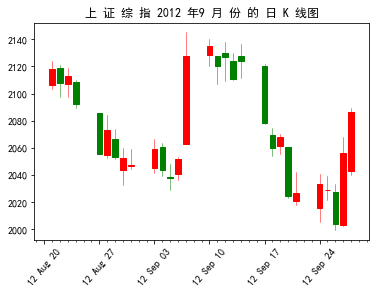

In [32]:
ssec201209=ssec2012['2012-08-21':'2012-09-30']

# Need to specify path before import
import candle
candle.candlePlot(ssec201209 ,title=' 上 证 综 指 2012 年9 月 份 的 日 K 线图 ')

In [33]:
# Dark Cloud Cover
# 提 取 读 入 上 证 综 指 年 的 日 交 易 数 据
import pandas as pd
ssec2011=pd.read_csv('ssec2011.csv')
ssec2011.index=ssec2011.iloc[:,1]
ssec2011.index=pd.to_datetime(ssec2011.index, format='%Y-%m-%d')
ssec2011=ssec2011.iloc[:,2:]

In [34]:
# 提 取 价 格 数 据
Close11=ssec2011.Close
Open11=ssec2011.Open

 刻 画 捕 捉 符 合 “ 乌 云 盖 顶 ” 形 态 的 连 续 两 个 蜡 烛 实 体
 条件1 第一个红色蜡烛实体  收盘价高于开盘价 ， 第二个绿色蜡烛 收盘价低于开盘价
 条件2 第二天开盘价高于第一天的收盘价，第二天收盘价位于第一天实体的下半部分（第二天收盘价低于第一天开盘和收盘价之和的一半）并且大于第一天的开盘价。
 条件3 前期为上升趋势

In [35]:
# 刻 画 捕 捉 符 合 “ 乌 云 盖 顶 ” 形 态 的 连 续 两 个 蜡 烛 实 体
lagClose11=Close11.shift(1)
lagOpen11=Open11.shift(1)
Cloud=pd.Series(0,index=Close11.index)
for i in range(1,len(Close11)):
    if all([Close11[i]<Open11[i],\
            lagClose11[i]>lagOpen11[i],\
            Open11[i]>lagClose11[i],\
            Close11[i]<0.5*(lagClose11[i]+lagOpen11[i]),\
            Close11[i]>lagOpen11[i]]):
        Cloud[i]=1

In [36]:
# 定 义 前 期 上 升 趋 势
Trend=pd.Series(0,index=Close11.index)
for i in range(2,len(Close11)):
    if Close11[i-1]>Close11[i-2]>Close11[i-3]:
        Trend[i]=1

In [37]:
Cloud.head(5)

Date
2011-01-04    0
2011-01-05    0
2011-01-06    0
2011-01-07    0
2011-01-10    0
dtype: int64

In [38]:
Trend.head()

Date
2011-01-04    0
2011-01-05    0
2011-01-06    0
2011-01-07    0
2011-01-10    0
dtype: int64

In [39]:
darkCloud=Cloud+Trend
darkCloud.head(20)

Date
2011-01-04    0
2011-01-05    0
2011-01-06    0
2011-01-07    0
2011-01-10    0
2011-01-11    0
2011-01-12    0
2011-01-13    1
2011-01-14    1
2011-01-17    0
2011-01-18    0
2011-01-19    0
2011-01-20    1
2011-01-21    0
2011-01-24    0
2011-01-25    0
2011-01-26    0
2011-01-27    0
2011-01-28    1
2011-01-31    1
dtype: int64

In [40]:
darkCloud[darkCloud==2]


Date
2011-05-19    2
2011-08-16    2
dtype: int64

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


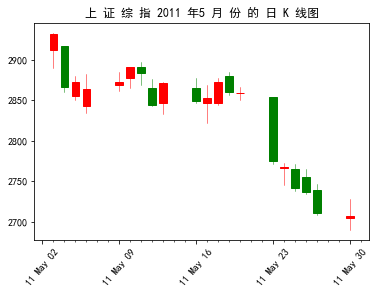

In [41]:
# 绘 制 上 证 综 指 2011 年5月 19 日 附 近 的 K 线图
ssec201105=ssec2011['2011-05-01':'2011-05-30']           
candle.candlePlot(ssec201105 ,\
                  title=' 上 证 综 指 2011 年5 月 份 的 日 K 线图 ')

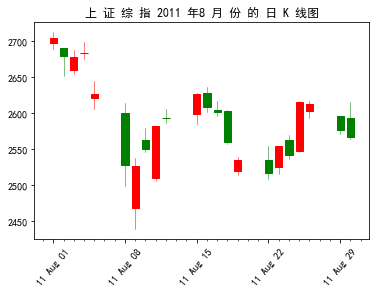

In [42]:
# 绘 制 上 证 综 指 2011 年8月 16 日 附 近 的 K 线图
ssec201108=ssec2011['2011-08-01':'2011-08-30']
candle.candlePlot(ssec201108 ,\
                  title=' 上 证 综 指 2011 年8 月 份 的 日 K 线图 ')